# Textual Analysis: Part 2
Introduction to Digital History 3/28/22

  Portions of the code are adapted from: https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/09-Topic-Modeling-Without-Mallet.html

In [3]:
#!pip install pandas
#!pip install openpyxl
#!pip install nltk
#!pip install tomotopy
#!pip install little_mallet_wrapper
#!pip install seaborn

## LOAD UHQ Data
Before we can do anything, we need to first load the UHQ data from our excel file into a pandas dataframe. 

In [2]:
import pandas as pd

#Load UHQ data into a pandas dataframe
df = pd.read_excel("UHQ_FULL_EDITED.xlsx")
df

,titles,document_type,author,gender,editor,translator,journal,volume,issue,year,pages,description,article_url,text
0,"I Have Shot My Betrayer: The Trial of Amanda Olson, 1890",NaN,LISA OLSEN TAIT,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 8-25,NaN,https://issuu.com/utah10/docs/utah_historical_quarterly_volume89_2021_number2/s/12121623,"It was Monday evening, September 29, 1890, about 6:30 p.m., just past the corner of C Street and First Avenue in Salt Lake City. It was almost dark; the sky was overcast and the weather portended the end of summer. Frank C. Hall, a thirty-eight year-old engineer by training currently employed as a barkeeper at the Mint Saloon, strolled along in the company of Ann Hart, a widow of about his age..."
1,How Idealized Womanhood Saved Annie Bradley from the Gallows,NaN,ALLISON EDWARDS,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 26-37,NaN,https://issuu.com/utah10/docs/utah_historical_quarterly_volume89_2021_number2/s/12121799,"On December 8, 1906, the sixty-three-year-old lawyer and former United States senator from Utah, Arthur Brown, was shot by his thirty-fouryear-old mistress, Annie Bradley, in his Washington, D.C. hotel room. 1 Bradley had followed Brown to D.C., where he was to argue a case before the Supreme Court; she planned to confront Brown and demand that he marry her, as he had promised throughout their..."
2,"Mountain Common Law, Redux: The Extralegal Punishment of Seducers in Early Utah",NaN,KENNETH L. CANNON II,male,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 38-55,NaN,https://issuu.com/utah10/docs/utah_historical_quarterly_volume89_2021_number2/s/12122011,"Violence and extralegal justice were widespread in nineteenth-century America. White caps, regulators, vigilantes, Ku Klux Klansmen, lynch mobs, and various other extralegal groups carried out their own distinctive brands of justice generally through violent means all around the country. 1 Though these groups were not unknown in older parts of the country, most extralegal groups appeared in fr..."
3,Josie Kensler: Murder and Survival in Southern Idaho,NaN,PAULA HUFF BRYANT,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 56-68,NaN,https://issuu.com/utah10/docs/utah_historical_quarterly_volume89_2021_number2/s/12122063,"Josephine “Josie” Kensler was a beautiful woman, with dark hazel eyes and curly brown locks, and she lived a sensational life. Kensler exploded into the limelight in the fall of 1896, when her husband of ten years mysteriously disappeared and a ranch hand was suddenly sharing her bed. 11 The sordid domestic affair, which took place in southwestern Idaho, captured headlines throughout the Unite..."
4,Organizing Farmers in Utah,NaN,MATTHEW C. GODFREY,male,NaN,NaN,Utah Historical Quarterly,89,1,2021,Pages 33-48,"Charles G. Patterson and the Intermountain Association of Sugar Beet Growers, 1917–1922 By Matthew C. Godfrey",https://issuu.com/utah10/docs/utah_historical_quarterly_volume89_2021_number1/s/12120887,"In 1917, Charles G. Patterson, a Utah attorney, spearheaded the organization of the Intermountain Association of Sugar Beet Growers (IASBG) to serve as an advocate for beet farmers in the Intermountain West. With the advent of the First World War, the price of sugar had gone up, but Patterson believed that sugar companies were not passing the increased profits on to farmers and that someone ne..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,Some Use Early Utah Indian References,NaN,J. CECIL ALTER,male,NaN,NaN,Utah Historical Quarterly,1,1-4,1928,Pages 55-59,"Continued from the January, 1928 issue)",https://issuu.com/utah10/docs/uhq_1928/s/50462,"UHQ Volume 2, Number 2\nApril 1928\nSOME USEFUL EARLY UTAH INDIAN REFERENCES\n(Continued from the January, 1928 issue) By J. Cecil Alter\nProbably the earliest printed reference to the Utah Indians is Francisco Garces' journal entry for February 26, 1776, when he was near the Rio de Santa Anna, in the coastal secti

# Part 1: A Distant Reading of UHQ
We can visualize all of UHQ in a word cloud which filters out some stopwords for us. Try changing **variable** to "titles" to see if you notice any differences between a wordcloud based on the full texts and a wordcloud based on titles alone. 

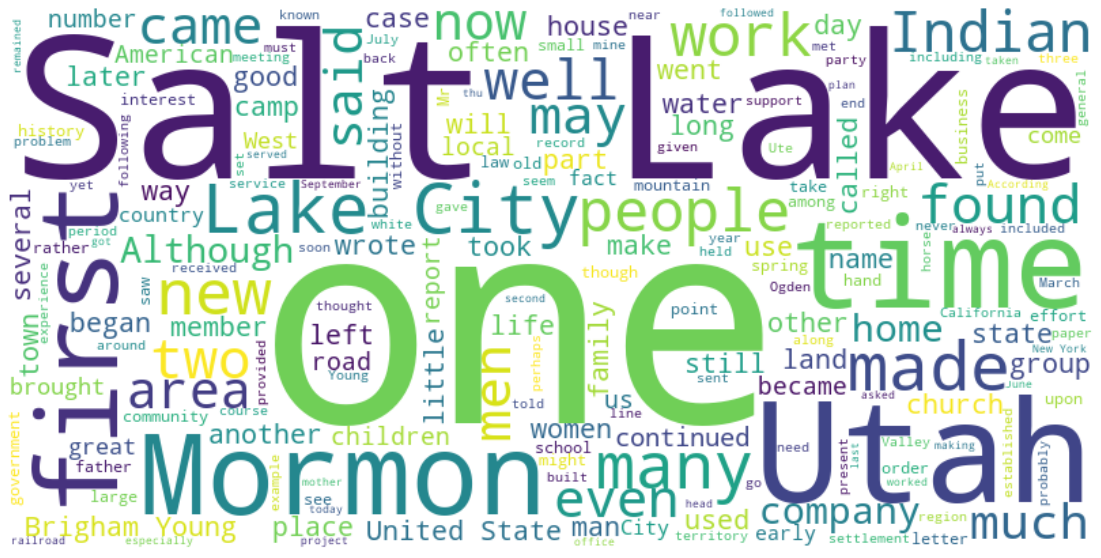

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

variable = "text" #try changing this variable to "titles" to see if you notice any differences. 

#creating string containing all UHQ texts
df2 = df[df[variable].notna()].reset_index()

word_cloud2 = WordCloud(background_color = 'white',
                       width=800, 
                       height=400).generate(' '.join([str(elem) for elem in df2[variable].tolist()]))

plt.figure(figsize=(20,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

### Count length of UHQ issues
The following code prints out the total length of UHQ articles by year. That is to say, this graph measures how many individual characters there are for each year of UHQ. 

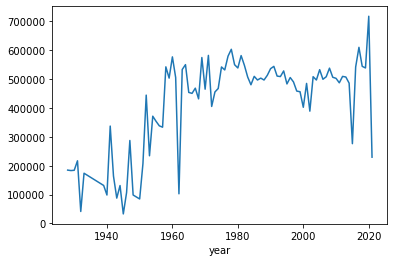

In [4]:
df['text_length'] = df['text'].str.len()
output = df.groupby(['year']).sum()
output['text_length'].plot()

### Trace word counts overtime
 Here we can trace the raw counts of certain words over time. Try changing the word variable to trace the evolution of different terms over time. Keep in mind that many of these trends, like Utah, might reflect the changing length of the journal over time. For example, increases in the appearance of "Utah" appears to be in line with the growth in the average length of the journal as shown in the graph above. 

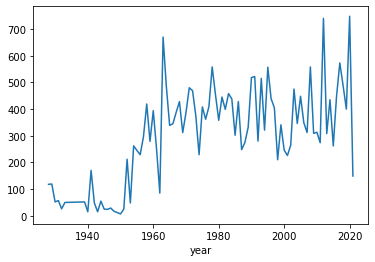

In [5]:
word = "Utah"

df['word_count'] = df.text.str.count(word)
output = df.groupby(['year']).sum()
output['word_count'].plot()

### Question: What stands out to you when looking at the word cloud and word counts overtime? Switch words and comment on your findings.

# PART 2: Gender Composition -- Who Writes Utah History?

An important question that we might ask is *who* is writing Utah history as found in UHQ. Jed Rogers points out in his article that much of the early history tended to be written by white Mormons. We could extend this analysis to look at the gender division as also found in our reading of Richard Jean So. Are women authors adequately represented in the history of Utah? 

  Gender data for authors of UHQ articles was compiled by using Lincoln Mullen (2018). gender: Predict Gender from Names Using Historical Data. R package version 0.5.2. See https://lincolnmullen.com/software/gender/
  

In [6]:
df2 = df[df['gender'].notna()]
gender_list = df2['gender'].tolist()
year_list = df2['year'].tolist()

full_gender_list = []
full_year_list = []

for g, y in zip(gender_list, year_list):
    temp_g = g.split(';')
    for t in temp_g:
        full_gender_list.append(t.strip())
        full_year_list.append(y)

len(full_gender_list), len(full_year_list)

(1515, 1515)

This graph plots the percentage of authors that are male each year. For example, in the first year of publication (1928), 100% of authors were male. 

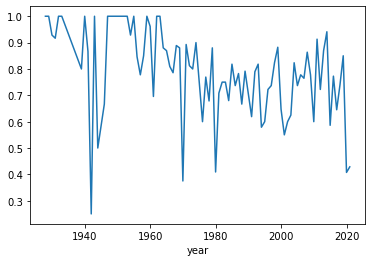

In [7]:
gender_df = pd.DataFrame()
gender_df['year'] = full_year_list
gender_df['gender'] = full_gender_list
output = gender_df[gender_df['gender'] == 'male'].groupby(['year']).count() / gender_df.groupby(['year']).count()
output['gender'].plot()

Now we can plot the inverse: what percentage of authors were female for each year. Notice that there are some missing data points. This is because there were 0 female authors for those years (i.e. 100% of the authors that year were male). 

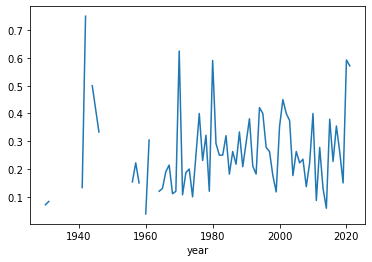

In [8]:
output = gender_df[gender_df['gender'] == 'female'].groupby(['year']).count() / gender_df.groupby(['year']).count()
output['gender'].plot()

We can then look at which years the percentage of women authors rose above a certain percentage, in this case 50%. These represent "outliers" and deserve further inquiry. Is there something wrong with our data for 1942, for example? Or is there something interesting happening that deserves further research? 

In [9]:
percentage = 0.5
output[output['gender'] > percentage]

,gender
year,
1942,0.750000
1970,0.625000
1980,0.590909
2020,0.592593
2021,0.571429


### Question: What are our findings regarding who is writing Utah history? What trends (if any) do we see over time? 

# PART 3: Historical Time -- When is Utah History? 

Here we are writing a script using regular expressions (remember those?) to identify the appearance of years in UHQ. This is a very crude approach. Basically we are looking for strings of four numbers that start with a 1 or 2 and don't include commas or other characters in between. So this approach would extract the year 1847 from a string such as: "Brigham Young arrived in the Salt Lake Valley in 1847." It has its limitations, however. It would also identify 1000 as a year from the following string: "I walked 1000 miles today." But it wouldn't identify it as a year if it appeared with a comma, such as "I walked 1,000 miles today." You can adjust the year_start and year_end variables to narrow or widen your timeframe. Begin with 1000-2022 and then try narrowing it down to 1800-2022 to focus in on key moments in history discussed in UHQ. 


In [10]:
import re

year_start = 1000
year_end = 2022

df2 = df[df['text'].notna()].reset_index()
texts = df2.text.tolist()
years = df2.year.tolist()
titles = df2.titles.tolist()
print(len(texts), len(years), len(titles))

dates = []
pub_dates = []
pub_titles = []
skips = [".", ",", ":", ";", "'", '"', '“', '”', '(', ')', '’'] 

for te, y, ti in zip(texts, years, titles):
    for ch in skips:
        te = te.replace(ch, "")
        
    for word in te.split(' '):
        if re.match(r'([1-2][0-9]{3}$)', word):
            if int(word) >= year_start and int(word) <= year_end:
                dates.append(int(word))
                pub_dates.append(y)
                pub_titles.append(ti)

print(len(dates), len(pub_dates), len(pub_titles))

1412 1412 1412
41287 41287 41287


We can save the results to a new dataframe and display the results. Here we have a dataframe that includes the title of the article, the year the article was published, and the years mentioned within the article. 

In [11]:
year_df = pd.DataFrame()
year_df['titles'] = pub_titles
year_df['pub_dates'] = pub_dates
year_df['dates'] = dates
year_df

,titles,pub_dates,dates
0,I Have Shot My Betrayer: The Trial of Amanda O...,2021,1890
1,I Have Shot My Betrayer: The Trial of Amanda O...,2021,1890
2,I Have Shot My Betrayer: The Trial of Amanda O...,2021,1850
3,I Have Shot My Betrayer: The Trial of Amanda O...,2021,1871
4,I Have Shot My Betrayer: The Trial of Amanda O...,2021,1885
...,...,...,...
41282,Personal Recollections of Wash-A-Kie: Chief of...,1928,1872
41283,Personal Recollections of Wash-A-Kie: Chief of...,1928,1886
41284,Personal Recollections of Wash-A-Kie: Chief of...,1928,1887
41285,Personal Recollections of Wash-A-Kie: Chief of...,1928,1862


Now we can visualize the results! Look at that! 

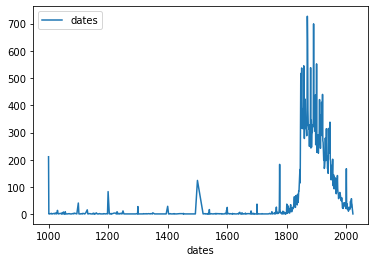

In [12]:
output = year_df.groupby(['dates'])[['dates']].count()
output.plot()

Finally, we can focus in on specific years to see how frequently any given years (such as 1847) appeared in UHQ. 

In [13]:
year = 1847

year_df[year_df.dates == year].count()

titles       517
pub_dates    517
dates        517
dtype: int64

### Question: What period of time are most frequently discussed in UHQ? Does this reveal anything about the nature of Utah history? 

# PART 4: Concordance, Collocation, and Word2Vec

We can take our textual analysis a step further to look at the contexts in which words occur. First, we will look at concordances, which shows our *key word in context* (kwic) -- that is, the sentence in which a given word occurs. NOTE: This code will take a while to run.

In [9]:
#find word associations
from nltk import Text, tokenize
import nltk
nltk.download("punkt")

df2 = df[df['text'].notna()].reset_index()


uhq_tokens = tokenize.word_tokenize(' '.join([str(elem) for elem in df2['text'].tolist()])) #tokenize
uhq = Text(uhq_tokens)

[nltk_data] Downloading package punkt to /Users/Spencer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Now we can display the context in which sample words occur, in this case Utah. 

In [21]:
word = "Brigham"
uhq.concordance(word, lines=10) #concordance

Displaying 10 of 4140 matches:
iably as they made their way toward Brigham Street . As they passed the corner 
s convened to investigate his act . Brigham Young , the president of the LDS ch
bodyguard for both Joseph Smith and Brigham Young and was sometimes numbered am
ildren of Joseph and Emma Smith and Brigham and Mary Ann Young . 17 Jedediah Gr
onable , given Monroe ’ s letter to Brigham Young . 42 The defense appears to h
e nineteenth-century church leaders Brigham Young and Wilford Woodruff had init
d the profane areas of the barns in Brigham Young ’ s family compound . The Mor
t surrounded both Temple Square and Brigham Young ’ s family compound to the ea
s centralized in both the person of Brigham Young and in the church center of S
r plan and an influential leader in Brigham Young facilitated the rapid settlem


In addition to concordance (kwic), we can also look at collocations, or the words that most frequently appear near our sample word. Note that in this case we DIDN'T remove stopwords, so the top words are going to be common words like "the", "and", "a", "it", and "this". STOPWORDS MATTER!

In [16]:
word = "Utah"
uhq.similar(word, 10) #collocation

the and a it this in his that their them


## Word Embedding
Expanding on collocations, we can conduct word embeddings, in this case using a library package known as word2vec. Here we will first create a function that will produce our word2vec model.  

In [17]:
#word2vec
from gensim.models import word2vec
from nltk import Text, tokenize
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download("stopwords")

#Create a function that will produce a word2vec model
def word_2_vec_model(text):
    print("Tokenizing by sentence")

    sent_full = []
    
    stop = set(stopwords.words('english') + list(string.punctuation) + [".", ", ", ":", ";", "'", '"', '``',"''", '’', '“', '”'])
    
    sent = tokenize.sent_tokenize(text)
    
    for s in sent:
        word_tokens = word_tokenize(s.lower())
        filtered = []
        for w in word_tokens:
            if w not in stop:
                filtered.append(w)
        sent_full.append(filtered)
        
    print("Creating word2vec model")
    model = word2vec.Word2Vec(
        sent_full,
        vector_size=150,
        window=10,
        min_count=2,
        workers=10,
        epochs=10)
    
    return model

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Spencer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now we need to feed our data into word2vec by using our function above. Because a word2vec model can take a while to run -- and because we are historians! -- it can make sense to limit the timeframe of our model. We might want to know how different words evolved over time in their usage. You can adjust the model below to include different timeframes by changing the variables *year_begin* and *year_end*. Note that word2vec works best with large volumes of data, so we would preferably want to work with chunks of at least 20-30 years. 

In [18]:
year_begin = 1928 #UHQ first year is 1928
year_end = 1950 #UHQ end year is 2021

#creating string containing all UHQ texts
df2 = df[(df['text'].notna()) & (df['year'] >= year_begin) & (df['year'] <= year_end)].reset_index()

full_uhq_texts = ' '.join([str(elem) for elem in df2.text.tolist()])

full_model = word_2_vec_model(full_uhq_texts)

Tokenizing by sentence
Creating word2vec model


We can display the top 20 words in our word2vec model. Do you notice any words that we might want to filter out in the future?  

In [19]:
full_model.wv.index_to_key[:20]

['river',
 'one',
 "'s",
 'indians',
 'miles',
 'us',
 'would',
 'two',
 'utah',
 'camp',
 'made',
 'time',
 'day',
 'came',
 'water',
 'indian',
 'went',
 'could',
 'lake',
 'men']

Yes! Filtering out stopwords makes a huge difference! Now we can look at specific words to understand what other words are used in a similar context. Change the *word* variable and try running it again. Note that all of the words in this model are lowercase, so you won't get any results for "Utah" but you would for "utah". 

In [20]:
word = "mormon"
full_model.wv.most_similar(word, topn=20)

[('government', 0.9718115925788879),
 ('mormons', 0.9513787627220154),
 ('provisional', 0.9450986385345459),
 ('maturity', 0.9445556998252869),
 ('non-mormon', 0.9417456388473511),
 ('saints', 0.9410915374755859),
 ('civic', 0.9363813400268555),
 ('united', 0.935745358467102),
 ('ex-officio', 0.933158278465271),
 ('university', 0.9307426810264587),
 ('states', 0.9303085803985596),
 ('exhibit', 0.9284436106681824),
 ('chief', 0.9278845191001892),
 ('state', 0.927604079246521),
 ('church', 0.9255098700523376),
 ('emigrated', 0.922849178314209),
 ('affairs', 0.9225261807441711),
 ('interest', 0.9218802452087402),
 ('latter-day', 0.9217810034751892),
 ('society', 0.9214524030685425)]

# PART 5: TOPIC MODELING -- What is Utah History?
Next we can move into topic modeling, where we can try to identify and trace the evolution of certain topics over time. Again, we can adjust our *year_begin* and *year_end* variables to focus in on specific periods of time. For now, we will run a topic model on all of our data with 30 topics. Feel free to narrow the timeframe or adjust the number of topics. 

In [21]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [22]:
year_begin = 1928 #UHQ first year is 1928
year_end = 2021 #UHQ end year is 2021

#creating string containing all UHQ texts
topic_model_df = df[(df['text'].notna()) & (df['year'] >= year_begin) & (df['year'] <= year_end)].reset_index()

texts = topic_model_df.text.tolist()
titles = topic_model_df.titles.tolist()

training_data = []
for t in texts:
    processed_text = little_mallet_wrapper.process_string(t, numbers='remove')
    training_data.append(processed_text)

little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 1412
Mean Number of Words per Document: 2363.5
Vocabulary Size: 69956


In [23]:
len(training_data), len(texts), len(titles), len(topic_model_df)

(1412, 1412, 1412, 1412)

In [24]:
# Number of topics to return
num_topics = 30
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())
    
print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -10.392134300830644
Iteration: 10	Log-likelihood: -9.843096578472382
Iteration: 20	Log-likelihood: -9.68351110332111
Iteration: 30	Log-likelihood: -9.594096608444165
Iteration: 40	Log-likelihood: -9.536011429479611
Iteration: 50	Log-likelihood: -9.494746990556797
Iteration: 60	Log-likelihood: -9.461193508264776
Iteration: 70	Log-likelihood: -9.433240977064774
Iteration: 80	Log-likelihood: -9.409967588365973
Iteration: 90	Log-likelihood: -9.391639425715088

Topic Model Results:


✨Topic 0✨

women woman utah children suffrage mrs work family mary home

✨Topic 1✨

utah american culture cultural images art stone also past native

✨Topic 2✨

would one time could much man people great way upon

✨Topic 3✨

day went evening home morning doctor night also sick arrived

✨Topic 4✨

utah state national political would party states federal government president

✨Topic 5✨

black king white salt men americans lake would police fight

✨Topic 6✨

w

Look at the topics that have been generated. Do they make sense? Does it make sense why certain words are grouped together? Do they constitute a possible topic? 

## Examine Top Documents and Titles

Load topic distributions

In [25]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

Make functions for displaying top documents. The get_top_docs() function is taken from Maria Antoniak’s Little Mallet Wrapper

In [26]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):
    
    sorted_data = sorted([(_distribution[topic_index], _document) 
                          for _distribution, _document 
                          in zip(topic_distributions, docs)], reverse=True)
    
    topic_words = topics[topic_index]
    
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")
    
    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')
    
    return

We can also display the top articles associated with each topic to make sure that the topics make sense. Below are the top articles associated with Topic 0. Change the topic_num variable to view top articles associated with the topic of your choice. 

In [27]:
topic_num = 0
get_top_docs(titles, topic_distributions, topic_index=topic_num, n=6)

### ✨Topic 0✨

women woman utah children suffrage mrs work family mary home

---

✨  
**Topic Probability**: 0.3147285580635071  
**Document**: Women's History in Utah Historical Quarterly



✨  
**Topic Probability**: 0.3034519851207733  
**Document**: From Housework to Office Clerk: Utah's Working Women, 1870-1890



✨  
**Topic Probability**: 0.296251505613327  
**Document**: The Echo of Equal Suffrage



✨  
**Topic Probability**: 0.29317083954811096  
**Document**: Laying the Foundation for Utah’s Beekeeping Success, 1848–1888



✨  
**Topic Probability**: 0.28756511211395264  
**Document**: Salt Lake City's Reapers' Club



✨  
**Topic Probability**: 0.28214848041534424  
**Document**: The Working Women of Salt Lake City: A Review of the Utah Gazetteer, 1892-93



Here we are taking the the topic probability for each article and adding that to our original dataframe. We are also creating an additional variable called Dominant_topic that will list the topic that has the highest probability score. 

In [28]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

topic_results = []
for topic_distribution in topic_distributions:
    topic_results.append({'topic_distribution': topic_distribution})

topics_df = pd.DataFrame(topic_results)
column_names = [f"Topic {number}" for number, topic in enumerate(topic_individual_words)]
topics_df[column_names] = pd.DataFrame(topics_df['topic_distribution'].tolist(), index = topics_df.index)
topics_df = topics_df.drop('topic_distribution', axis='columns')
topics_df['Dominant_topic'] = (np.argmax(topics_df.values, axis=1))

full_topics_model_df = pd.merge(topic_model_df, topics_df, left_index = True, right_index = True)
full_topics_model_df

,index,titles,document_type,author,gender,editor,translator,journal,volume,issue,year,pages,description,article_url,text,text_length,word_count,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Dominant_topic
0,0,I Have Shot My Betrayer: The Trial of Amanda O...,NaN,LISA OLSEN TAIT,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 8-25,NaN,https://issuu.com/utah10/docs/utah_historical_...,"It was Monday evening, September 29, 1890, abo...",32767.0,7.0,0.067852,0.024096,0.182554,0.012406,0.026136,0.263085,0.044345,0.000040,0.018220,0.000030,0.009723,0.004588,0.001091,0.089844,0.003903,0.043361,0.000074,0.002884,0.043757,0.000045,0.002114,0.000101,0.115192,0.004957,0.000088,0.000071,0.019659,0.000076,0.000112,0.019596,5
1,1,How Idealized Womanhood Saved Annie Bradley fr...,NaN,ALLISON EDWARDS,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 26-37,NaN,https://issuu.com/utah10/docs/utah_historical_...,"On December 8, 1906, the sixty-three-year-old ...",32767.0,9.0,0.249073,0.011180,0.128523,0.003188,0.042940,0.235308,0.002591,0.000040,0.007670,0.000030,0.024313,0.000483,0.000064,0.105817,0.002555,0.022667,0.000074,0.000491,0.076600,0.000046,0.000060,0.002865,0.034330,0.007418,0.000089,0.000071,0.021211,0.019073,0.000113,0.001115,0
2,2,"Mountain Common Law, Redux: The Extralegal Pun...",NaN,KENNETH L. CANNON II,male,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 38-55,NaN,https://issuu.com/utah10/docs/utah_historical_...,Violence and extralegal justice were widesprea...,32767.0,38.0,0.025715,0.001813,0.133763,0.004805,0.003150,0.198997,0.005573,0.000040,0.000070,0.000030,0.002159,0.103804,0.000062,0.272976,0.003512,0.047150,0.000073,0.001493,0.038423,0.000045,0.000059,0.059870,0.063282,0.000161,0.000087,0.000407,0.004529,0.001763,0.000111,0.026079,13
3,3,Josie Kensler: Murder and Survival in Southern...,NaN,PAULA HUFF BRYANT,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 56-68,NaN,https://issuu.com/utah10/docs/utah_historical_...,Josephine “Josie” Kensler was a beautiful woma...,32767.0,2.0,0.121122,0.000117,0.060733,0.030104,0.021600,0.272275,0.078873,0.000037,0.000382,0.000028,0.006447,0.000126,0.013019,0.034260,0.048809,0.159208,0.006074,0.009617,0.039763,0.000042,0.006378,0.005151,0.017829,0.023228,0.012410,0.006388,0.011827,0.004180,0.000104,0.009872,5
4,4,Organizing Farmers in Utah,NaN,MATTHEW C. GODFREY,male,NaN,NaN,Utah Historical Quarterly,89,1,2021,Pages 33-48,Charles G. Patterson and the Intermountain Ass...,https://issuu.com/utah10/docs/utah_historical_...,"In 1917, Charles G. Patterson, a Utah attorney...",32767.0,73.0,0.000395,0.002528,0.078618,0.001794,0.125012,0.020004,0.002231,0.000040,0.003503,0.000030,0.076996,0.114400,0.001093,0.024148,0.000137,0.001588,0.000074,0.241366,0.084336,0.000045,0.007952,0.000101,0.057096,0.042026,0.094107,0.000071,0.007347,0.012772,0.000112,0.000078,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1416,Some Use Early Utah Indian References,NaN,J. CECIL ALTER,male,NaN,NaN,Utah Historical Quarterly,1,1-4,1928,Pages 55-59,"Continued from the January, 1928 issue)",https://issuu.com/utah10/docs/uhq_1928/s/50462,"UHQ Volume 2, Number 2\nApril 1928\nSOME USEFU...",10352.0,5.0,0.000174,0.012038,0.190539,0.003749,0.000380,0.000345,0.006388,0.000136,0.000241,0.274094,0.039930,0.000463,0.000215,0.012045,0.049224,0.026271,0.000250,0.002813,0.000910,0.220741,0.000203,0.003826,0.022521,0.001715,0.006105,0.013011,0.013249,0.000258,0.097903,0.000264,9
1408,1417,"Gunnison Massacre-1853-Millard County, Utah-In...",NaN,JOSIAH F. GIBBS,male,NaN,NaN,Utah Historical Quarterly,1,1-4,1928,Pages 70-79,Nearly seventy-five ye

Now we can see which topic is most represented in our corpus. On the left is the topic number and on the right is the number of times that topic appears as the Dominant_topic. 

In [29]:
full_topics_model_df['Dominant_topic'].value_counts()

4     91
28    86
14    76
2     76
19    76
6     71
11    66
20    61
15    57
17    55
12    50
29    50
27    50
24    50
1     47
25    40
21    40
26    37
8     35
13    34
18    32
5     31
23    30
0     30
10    29
16    27
7     25
3     21
22    21
9     18
Name: Dominant_topic, dtype: int64

Next, we can list out all of the articles associated with a given topic, in this case we are looking at topic 21. Change the topic_number value to explore other topics. And check the meaning of the given topic by looking above. 

In [30]:
topic_number = 21

full_topics_model_df[full_topics_model_df.Dominant_topic == topic_number]

,index,titles,document_type,author,gender,editor,translator,journal,volume,issue,year,pages,description,article_url,text,text_length,word_count,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Dominant_topic
67,67,Thomas L. Kane's 1858 Utah War Mission: Presid...,NaN,WILLIAM P. MACKINNON,male,NaN,NaN,Utah Historical Quarterly,86,4,2018,Pages 6-25,NaN,https://issuu.com/utah10/docs/uhq_volume86_201...,Below the surface of James Buchanan’s reputati...,32720.0,46.0,0.000050,0.006188,0.109529,0.007826,0.092081,0.042548,0.014655,0.001387,0.000070,0.006430,0.004849,0.043256,0.000399,0.059419,0.007546,0.049060,0.058354,0.001153,0.057198,0.000045,0.000059,0.348443,0.030454,0.018690,0.000087,0.000070,0.035175,0.000075,0.004827,0.000077,21
82,82,"Uninvited, Unwelcome, and Uncomfortable",NaN,WILLIAM P.MACKINNON,male,NaN,NaN,Utah Historical Quarterly,85,2,2017,Pages 84-90,NaN,https://issuu.com/utah10/docs/uhq_volume85_201...,In 2008 I predicted the continued discovery of...,22286.0,40.0,0.006925,0.021714,0.071999,0.003538,0.020225,0.016785,0.010034,0.005441,0.000102,0.001022,0.009002,0.026623,0.006453,0.028079,0.009494,0.019883,0.201247,0.010974,0.036110,0.002512,0.000085,0.306506,0.038857,0.005617,0.000126,0.005974,0.132338,0.001577,0.000650,0.000111,21
161,170,Utah and the Civil War Press,NaN,KENNETH L. ALFORD,male,NaN,NaN,Utah Historical Quarterly,80,1,2012,Pages 77-94,NaN,https://issuu.com/utah10/docs/uhq_volume80_201...,"Shortly after the Civil War ended, the New Yor...",32767.0,100.0,0.007533,0.000125,0.139480,0.000078,0.119145,0.027649,0.007313,0.001400,0.001771,0.000030,0.013057,0.109987,0.003804,0.030396,0.005577,0.007696,0.105503,0.001844,0.050601,0.000045,0.000059,0.175591,0.159301,0.005944,0.000088,0.000410,0.008643,0.000075,0.014395,0.002458,21
163,172,"Hammering Utah, Squeezing Mexico, and Coveting...",NaN,WILLIAM P. MACKINNON,male,NaN,NaN,Utah Historical Quarterly,80,2,2012,Pages 30-49,NaN,https://issuu.com/utah10/docs/uhq_volume80_201...,We must have Cuba. We can’t do without Cuba . ...,32767.0,40.0,0.001794,0.031832,0.115359,0.000428,0.083728,0.018568,0.000872,0.000041,0.000072,0.039747,0.000137,0.023481,0.014348,0.019292,0.000487,0.007535,0.146748,0.002586,0.073435,0.000046,0.000061,0.293448,0.056578,0.010269,0.000438,0.003556,0.053796,0.000077,0.001159,0.000079,21
170,179,Utah’s Civil War(s): Linkages and Connections,NaN,WILLIAM P. MACKINNON,male,NaN,NaN,Utah Historical Quarterly,80,4,2012,Pages 6-23,NaN,https://issuu.com/utah10/docs/uhq_volume80_201...,“Could my voice be as effectually heard in the...,32767.0,93.0,0.000050,0.018091,0.109511,0.000076,0.057340,0.030711,0.009484,0.000039,0.002731,0.000362,0.003791,0.081322,0.000062,0.012769,0.002462,0.030488,0.244304,0.000141,0.056161,0.000044,0.000058,0.266957,0.031410,0.009143,0.000751,0.000069,0.020434,0.000074,0.011089,0.000076,21
171,180,"A Terror to Evil-Doers: Camp Douglas, Abraham ...",NaN,WILL BAGLEY,male,NaN,NaN,Utah Historical Quarterly,80,4,2012,Pages 24-43,NaN,https://issuu.com/utah10/docs/uhq_volume80_201...,"In September 1863, Captain George Price’s Comp...",32767.0,38.0,0.001038,0.001110,0.139773,0.002053,0.049872,0.056453,0.040042,0.000039,0.002046,0.000029,0.021551,0.105261,0.000061,0.033080,0.046929,0.025913,0.123986,0.003105,0.010145,0.033000,0.002035,0.187618,0.064066,0.000157,0.003710,0.001716,0.020239,0.001721,0.023177,0.000075,21
223,232,"""A Lion in the Path"": Genesis of the Utah War,...",NaN,DAVID L. BIGLER,male,NaN,NaN,Utah Historical Quarterly,76,1,2008,Pages 6-23,NaN,https://issuu.com/utah10/docs/uhq_volume76_200...,"In December 1857, two American armies confront...",32767.0,34.0,0.000049,0.004052,0.145173,0.000075,0.087581,0.021720,0.022770,0.000694,0.002034,0.000029,0.039115,0.122004,0.001043,0.126256,0.034858,0.028381,0.048886,0.0004

Instead of displaying the individual articles, we can look at the representation of these topics over time. The first graph is a representation of the number of articles for which topic 21 is the dominant topic each year. 

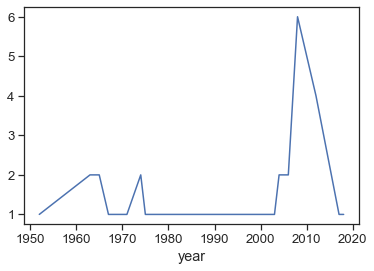

In [31]:
topic_number = 21

topic_graph = full_topics_model_df[full_topics_model_df.Dominant_topic == topic_number]

output = topic_graph.groupby(['year']).count()
output['Dominant_topic'].plot()

In addition to looking at when topic 21 is the dominant topic, we can also look at its average probability score over time for a given topic. What we see is that topic 21 isn't always the dominant topic, but that doesn't mean scholars aren't writing about many of the issues found in topic 21. Rather it is a topic that has been frequently discussed, but possibly hasn't been the central theme of a given paper.  

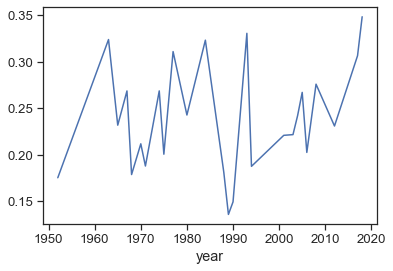

In [32]:
topic_number = 21

output = topic_graph.groupby(['year']).mean()
output["Topic "+ str(topic_number)].plot()

### Question: What are some of the major topics that you observe in UHQ? Did you learn anything new about Utah history through topic modeling? 

# PART 6: Named Entity Recognition -- Who is Utah History?
A final method that we will explore here is Named Entity Recognition (NER). NER is a method of identifying certain characteristics of a text, such as names, places, dates, and organizations. We can use this method to extract information that we are interested in, which in this case is the names of historical figures found in UHQ. 

  **Note: this process can take a long time, so I recommend that you just look at the results below instead of trying to run the code.** 

In [1]:
#!pip install -U spacy
#!python -m spacy download en_core_web_sm
import spacy
from spacy import displacy
from collections import Counter
import pandas as pd
pd.options.display.max_rows = 600
pd.options.display.max_colwidth = 400
import en_core_web_sm
nlp = en_core_web_sm.load()

Here is the first 2000 characters of a single article in UHQ with NER tags. You will notice that it does some things quite well. Monday and September 29, 1890 are clearly dates. Evening and 6:30 pm are time. C Street is a location and Salt Lake City is a city (GPE). Amanda Olson and Frank C. Hall are both people. But it also makes some clear errors. At times it identifies Ann Hart as an organization rather than a person. What other potential errors do you spot? 

In [4]:
text = df.text.tolist()[0][:2000]
document = nlp(text)
displacy.render(document, style="ent")

Using simple loops and conditional statements, we can extract strings with the "Person" tag. Because we are mostly interested in full names of individuals (Amanda Olson and John Olson as opposed to just Olson), I added a conditional statement to just keep full names. The results look pretty good, but there will be errors or missing names (e.g. Ann Hart). 

In [5]:
for named_entity in document.ents:
    if named_entity.label_ == "PERSON":
        if len(named_entity.text.split(' ')) > 1:
            print(named_entity)

Frank C. Hall
Amanda Olson
Amanda Olson
James Sharp


Finally, we can do what we did above, but on the entire corpus of UHQ articles. There are two ways that we could do this. We could count the total number of times that a given individual is mentioned throughout all of UHQ, or we could count how many articles each figure appears at least once. I have opted for the latter, but it would be a good idea to try both to make sure that this approach isn't skewing the results too much. The dataframe below shows that there are 28,036 unique string names along with the number of articles in which they appear. There will be some duplicates which will need to be cleaned up. But the preliminary results are striking. Brigham Young appears in well over 1/3 of all UHQ articles! Next is Joseph Smith followed by a list of other influential leaders of the LDS church. 

In [7]:
texts = df[df.text.notna()].text.tolist()
people = []

for t in texts:
    sub_people = []
    document = nlp(t)
    for named_entity in document.ents:
        if named_entity.label_ == "PERSON":
            if len(named_entity.text.split(' ')) > 1:
                if named_entity.text not in sub_people:
                    sub_people.append(named_entity.text.replace("’s", ""))
    for sp in sub_people:
        people.append(sp)

people_tally = Counter(people)

people_df = pd.DataFrame(people_tally.most_common(), columns=['character', 'count'])
people_df[:50]

,character,count
0,Brigham Young,551
1,Joseph Smith,186
2,Wilford Woodruff,119
3,John Taylor,111
4,George Q. Cannon,105
5,George A. Smith,95
6,Heber C. Kimball,85
7,Brigham Young's,85
8,Joseph F. Smith,84
9,Utah Territory,78


In [23]:
people_df.to_excel("people_df.xlsx")

### Question: Who are some individuals that frequently appear in UHQ? What does this say about who Utah history is being written about and written for? 